# ITS307 Data Analytics : Spring Semester 2022
# Assignment 4

# Unsupervised Learning: Clustering

![image.png](attachment:image.png)

# Table of Contents 
<ol start="0">
<li> Part A </li>
<li> Part B </li>
<li> Part C</li>
</ol>

## Note: Handle null values and special characters if any.

# Part A

Instructions:
1. Read data from data1.csv file and give random column names such as A, B, C and so on.


2. Use both Elbow method and silhouette_score to find best value of K for KMean clustering. Justify your answer.


3. Create Kmean model with value of K chosen from second step. Evaluate your model and justify the goodness of your model.


In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

In [142]:
df = pd.read_csv("data1.csv", names = ['A','B','C','D','E','F','G','H','I','J','K','L','M'])
df.head()

A     B     C     D    E     F     G     H     I     J     K     L  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      M  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [143]:
df.keys()

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'], dtype='object')

In [144]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
dtype: int64

In [145]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)

In [146]:
kmean.fit(df) 

KMeans(n_clusters=3)

In [147]:
kmean.labels_ 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [148]:
df['cluster'] = kmean.labels_
df.head()

A     B     C     D    E     F     G     H     I     J     K     L  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

      M  cluster  
0  1065        0  
1  1050        0  
2  1185        0  
3  1480        0  
4   735        2

In [149]:
K = np.arange(1,10)
sse = []
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(df.drop('cluster',axis=1))
    sse.append(km.inertia_)

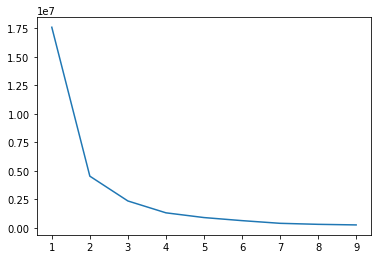

In [150]:
plt.plot(K,sse)

The best value of K is 4 as at that point, the sum of squared distance starts to flatten out forming an elbow.

In [151]:
from sklearn.metrics import silhouette_score
sil_scores = []
K = np.arange(2,11)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df.drop('cluster',axis=1))
    sil_scores.append(silhouette_score(df.drop('cluster',axis=1),km.labels_,metric='euclidean'))

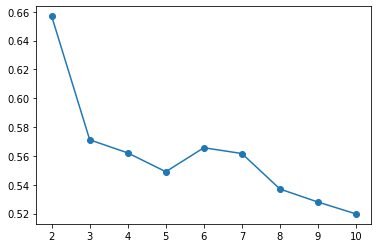

In [152]:
plt.plot(K,sil_scores,'-o') 

The best value of K is 2 as at that point, it has the maximum value of silhouttee score.

In [153]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2)
kmean.fit(df) 

KMeans(n_clusters=2)

In [184]:
x_sample = [[14.23,	1.71]]
kmean.predict(x_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([3], dtype=int32)

# Part B

In [154]:
import seaborn as sns

### INSTRUCTIONS
1. Read data from data2.csv and give any random column names such as x,y.


2. Use appropriate techniques to find best choices of algorithm to apply to given dataset. Justify your choice.


3. Create clustering model from your choices of algorithm in step 2. Tune required hyperparameters to get expected clusters.


4. Use seaborn to plot your clusters using different markers and colors for each clusters formed.


5. Evaluate your model and justify the goodness of the cluster formed.

In [155]:
df1 = pd.read_csv("data2.csv", names = ['X', 'Y'])
df1.head()

X         Y
0  1.481265 -1.058590
1  0.360573 -1.157805
2 -1.684897 -1.133287
3  1.946917 -1.187486
4  0.220311  0.844432

In [156]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=10)
dbscan.fit(df1)

DBSCAN(eps=1, min_samples=10)

In [157]:
dbscan.labels_

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [158]:
df1['dbscan'] = dbscan.labels_
df1.head()

X         Y  dbscan
0  1.481265 -1.058590       0
1  0.360573 -1.157805       0
2 -1.684897 -1.133287       0
3  1.946917 -1.187486       0
4  0.220311  0.844432       1

In [159]:
db0 = df1[df1.dbscan == 0]
db0.head()

X         Y  dbscan
0  1.481265 -1.058590       0
1  0.360573 -1.157805       0
2 -1.684897 -1.133287       0
3  1.946917 -1.187486       0
5  1.344560 -0.991684       0

In [160]:
db1 = df1[df1.dbscan == 1]
db1.head()

X         Y  dbscan
4   0.220311  0.844432       1
6  -1.125771  1.161369       1
7  -0.524397  0.744974       1
8   1.743963  1.451582       1
10  0.498376  1.075230       1

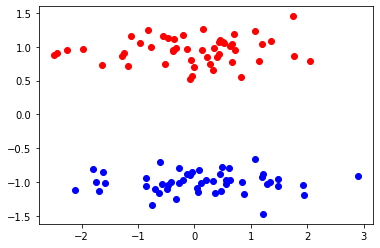

In [161]:
plt.scatter(db0['X'],db0['Y'],color='blue')
plt.scatter(db1['X'],db1['Y'],color='red')

# Part C

### INSTRUCTIONS:

1. Read data from data3.csv and name columns as x and y.


2. Assuming 4 clusters in the given datasets, compare both clustering algorithm and mention which algorithm is more suitable.


3. Use seaborn to plot your clusters for both the algorithms.

In [162]:
df3 = pd.read_csv("data3.csv", names = ['x','y'])
df3.head()

x         y
0 -4.394278  9.986850
1 -3.446856 -0.340388
2 -2.924456 -0.115665
3 -4.533322  2.782269
4 -4.257819  8.498752

KMean

In [163]:
kmean = KMeans(n_clusters=4)
kmean.fit(df3)

KMeans(n_clusters=4)

In [164]:
kmean.labels_

array([1, 0, 0, 2, 1, 0, 1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 0, 0, 1,
       0, 3, 1, 3, 1, 3, 3, 0, 1, 2, 0, 2, 3, 2, 3, 3, 2, 2, 1, 1, 3, 1,
       0, 2, 1, 3, 0, 1, 3, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 2, 1, 1, 0, 0,
       3, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 3, 0, 2,
       0, 1, 2, 0, 2, 3, 3, 2, 3, 1, 0, 3], dtype=int32)

In [165]:
kmean.cluster_centers_

array([[-2.26100823, -0.63792927],
       [-4.46343585,  9.96867608],
       [-4.36659854,  2.45837114],
       [-0.39233905,  8.09893604]])

In [166]:
kmean.inertia_

179.29171128594288

In [167]:
df3['cluster'] = kmean.labels_
df3.head()

x         y  cluster
0 -4.394278  9.986850        1
1 -3.446856 -0.340388        0
2 -2.924456 -0.115665        0
3 -4.533322  2.782269        2
4 -4.257819  8.498752        1

In [168]:
c0 = df3[df3.cluster == 0]
c0

x         y  cluster
1  -3.446856 -0.340388        0
2  -2.924456 -0.115665        0
5  -3.492740 -0.672294        0
19 -3.512515 -0.083221        0
20 -1.660840 -1.117308        0
22 -0.881670 -0.652058        0
29 -3.100312 -1.077285        0
32 -2.870407 -0.222065        0
44 -1.423922 -1.513315        0
48 -3.271907  0.635460        0
53 -1.852016 -1.044502        0
64 -1.041874  0.665129        0
65 -1.280635 -1.973173        0
74 -1.212213 -1.140883        0
79 -1.256394 -0.522753        0
80 -1.971559 -0.375065        0
81 -2.129517 -1.385710        0
86 -1.700805  1.567417        0
88 -1.683122 -0.644344        0
91 -2.950576 -1.303433        0
98 -3.816837 -2.081060        0

In [169]:
c1 = df3[df3.cluster == 1]
c1

x          y  cluster
0  -4.394278   9.986850        1
4  -4.257819   8.498752        1
6  -3.273590  10.314390        1
11 -5.186093  10.242716        1
12 -4.443636  10.121907        1
17 -3.372678   8.984123        1
21 -4.687161   9.254266        1
24 -4.736415  10.722325        1
26 -3.346745  10.895823        1
30 -3.589794  11.231315        1
40 -4.356760  11.318418        1
41 -4.777510   9.097130        1
43 -3.812525   8.748021        1
46 -3.895536   8.524907        1
49 -4.107489  10.588919        1
52 -3.609414   8.917687        1
62 -7.612348   9.010966        1
63 -4.787270   9.292075        1
68 -5.085526   9.582580        1
72 -4.805330  10.856464        1
73 -3.524637   8.999724        1
75 -5.231267  10.678805        1
83 -5.737143  11.382502        1
89 -3.209932   9.531695        1
97 -5.744999  12.434546        1

In [170]:
c2 = df3[df3.cluster == 2]
c2

x         y  cluster
3  -4.533322  2.782269        2
8  -4.041835  2.748770        2
15 -3.682538  0.968225        2
16 -4.046161  3.694628        2
18 -4.254036  1.713184        2
31 -4.751956  3.627521        2
33 -4.192204  2.534003        2
35 -6.874053  2.180535        2
38 -4.601520  2.565877        2
39 -5.767563  2.791538        2
45 -4.625157  2.798878        2
51 -3.973002  1.848230        2
56 -3.952166  0.887075        2
57 -5.472948  3.667704        2
60 -4.271747  2.246337        2
61 -3.927514  1.785809        2
67 -5.573463  3.718497        2
69 -5.801019  2.578830        2
70 -3.666521  1.328130        2
71 -3.634092  0.837192        2
76 -4.295260  2.245280        2
77 -4.105424  2.043943        2
78 -2.800359  2.357021        2
82 -4.474609  2.814145        2
84 -2.945951  3.603316        2
87 -3.761760  4.270507        2
90 -3.935872  2.640637        2
92 -2.663410  3.816875        2
95 -6.005893  0.197806        2

In [171]:
c3 = df3[df3.cluster == 3]
c3

x         y  cluster
7  -0.874748  7.847986        3
9  -0.632853  8.364432        3
10  0.172921  6.742141        3
13 -1.019265  8.007922        3
14 -1.772029  8.493603        3
23 -0.999680  8.594857        3
25  0.247762  7.736495        3
27  0.027881  8.524792        3
28 -1.263936  7.918566        3
34 -0.575714  8.031338        3
36 -0.237521  9.356763        3
37 -0.823502  7.952524        3
42  0.522239  8.392059        3
47 -1.167643  8.402013        3
50 -0.767054  8.169578        3
54 -1.704802  5.797639        3
55 -0.834814  9.124658        3
58  0.746051  9.038425        3
59  0.764814  8.703338        3
66 -0.556284  5.805388        3
85  0.291812  7.544295        3
93  1.910413  8.590891        3
94 -0.006249  9.102656        3
96  0.180038  6.898378        3
99 -1.436312  9.332665        3

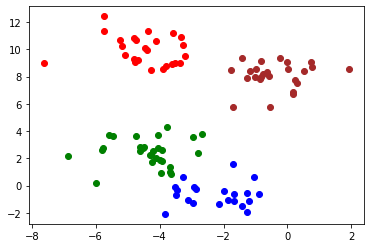

In [172]:
plt.scatter(c0['x'],c0['y'],color='blue')
plt.scatter(c1['x'],c1['y'],color='red')
plt.scatter(c2['x'],c2['y'],color='green')
plt.scatter(c3['x'],c3['y'],color='brown')

DBSCAN

In [173]:
dbscan.fit(df3)

DBSCAN(eps=1, min_samples=10)

In [174]:
dbscan.labels_

array([ 0, -1, -1,  1, -1, -1, -1,  2,  1,  2, -1,  0,  0,  2,  2,  1,  1,
       -1,  1, -1,  3,  0,  3,  2,  0,  2, -1,  2,  2, -1, -1,  1, -1,  1,
        2, -1,  2,  2,  1, -1, -1,  0,  2, -1,  3,  1, -1,  2, -1,  0,  2,
        1, -1,  3, -1,  2,  1, -1,  2,  2,  1,  1, -1,  0, -1,  3, -1, -1,
        0, -1,  1,  1,  0, -1,  3,  0,  1,  1, -1,  3,  3,  3,  1, -1, -1,
        2, -1, -1,  3, -1,  1, -1, -1, -1,  2, -1, -1, -1, -1,  2])

In [175]:
df3['dbscan'] = dbscan.labels_
df3.head()

x         y  cluster  dbscan
0 -4.394278  9.986850        1       0
1 -3.446856 -0.340388        0      -1
2 -2.924456 -0.115665        0      -1
3 -4.533322  2.782269        2       1
4 -4.257819  8.498752        1      -1

In [176]:
db30 = df3[df3.dbscan == 0]
db30

x          y  cluster  dbscan
0  -4.394278   9.986850        1       0
11 -5.186093  10.242716        1       0
12 -4.443636  10.121907        1       0
21 -4.687161   9.254266        1       0
24 -4.736415  10.722325        1       0
41 -4.777510   9.097130        1       0
49 -4.107489  10.588919        1       0
63 -4.787270   9.292075        1       0
68 -5.085526   9.582580        1       0
72 -4.805330  10.856464        1       0
75 -5.231267  10.678805        1       0

In [177]:
db31 = df3[df3.dbscan == 1]
db31

x         y  cluster  dbscan
3  -4.533322  2.782269        2       1
8  -4.041835  2.748770        2       1
15 -3.682538  0.968225        2       1
16 -4.046161  3.694628        2       1
18 -4.254036  1.713184        2       1
31 -4.751956  3.627521        2       1
33 -4.192204  2.534003        2       1
38 -4.601520  2.565877        2       1
45 -4.625157  2.798878        2       1
51 -3.973002  1.848230        2       1
56 -3.952166  0.887075        2       1
60 -4.271747  2.246337        2       1
61 -3.927514  1.785809        2       1
70 -3.666521  1.328130        2       1
71 -3.634092  0.837192        2       1
76 -4.295260  2.245280        2       1
77 -4.105424  2.043943        2       1
82 -4.474609  2.814145        2       1
90 -3.935872  2.640637        2       1

In [178]:
db32 = df3[df3.dbscan == 2]
db32

x         y  cluster  dbscan
7  -0.874748  7.847986        3       2
9  -0.632853  8.364432        3       2
13 -1.019265  8.007922        3       2
14 -1.772029  8.493603        3       2
23 -0.999680  8.594857        3       2
25  0.247762  7.736495        3       2
27  0.027881  8.524792        3       2
28 -1.263936  7.918566        3       2
34 -0.575714  8.031338        3       2
36 -0.237521  9.356763        3       2
37 -0.823502  7.952524        3       2
42  0.522239  8.392059        3       2
47 -1.167643  8.402013        3       2
50 -0.767054  8.169578        3       2
55 -0.834814  9.124658        3       2
58  0.746051  9.038425        3       2
59  0.764814  8.703338        3       2
85  0.291812  7.544295        3       2
94 -0.006249  9.102656        3       2
99 -1.436312  9.332665        3       2

In [179]:
db33 = df3[df3.dbscan == 3]
db33

x         y  cluster  dbscan
20 -1.660840 -1.117308        0       3
22 -0.881670 -0.652058        0       3
44 -1.423922 -1.513315        0       3
53 -1.852016 -1.044502        0       3
65 -1.280635 -1.973173        0       3
74 -1.212213 -1.140883        0       3
79 -1.256394 -0.522753        0       3
80 -1.971559 -0.375065        0       3
81 -2.129517 -1.385710        0       3
88 -1.683122 -0.644344        0       3

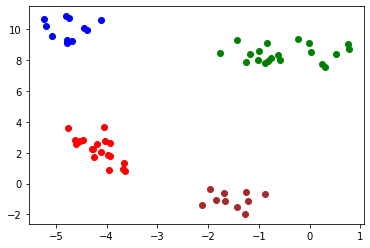

In [180]:
plt.scatter(db30['x'],db30['y'],color='blue')
plt.scatter(db31['x'],db31['y'],color='red')
plt.scatter(db32['x'],db32['y'],color='green')
plt.scatter(db33['x'],db33['y'],color='brown')

DBSCAN algorithm is best suitable for this dataset as it isn't a large dataset.